<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_of_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
import graphviz

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [109]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [110]:
# df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [111]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


# Завдання 1
Очистіть дані від викидів(лише `price`), розділіть на тренувальну та тестову чатини

<Axes: >

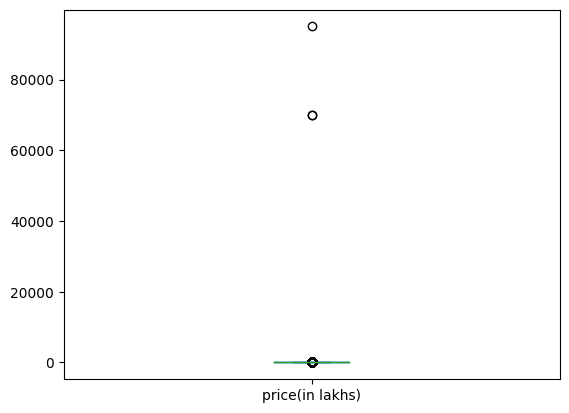

In [112]:
df['price(in lakhs)'].plot(kind='box')

In [113]:
df = df[df['price(in lakhs)'] < 65000]

<Axes: >

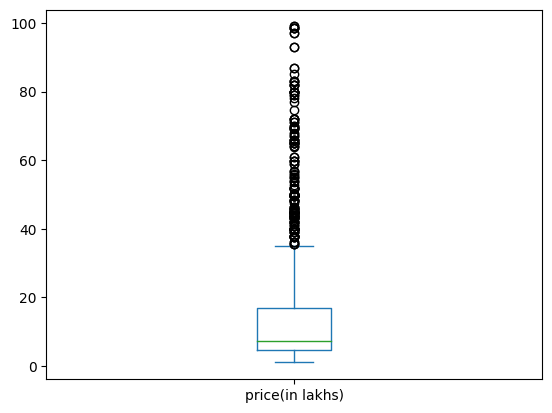

In [114]:
df['price(in lakhs)'].plot(kind='box')

In [115]:
y = df['price(in lakhs)']
X = df.drop(columns='price(in lakhs)')

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [118]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False,
                                     handle_unknown='ignore'))])  # sparse_output для кращої візуалізації

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

# для візуалізації вказуємо щоб результатом була таблиця
preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [119]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=4,
                                         random_state=42)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=4, random_state=42))])

In [120]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=4, random_state=42))])

In [121]:
model['prep'].set_output(transform='pandas')
model['prep'].transform(X_train)

,num__seats,num__kms_driven,num__mileage(kmpl),num__engine(cc),num__max_power(bhp),num__torque(Nm),cat__insurance_validity_Comprehensive,cat__insurance_validity_Petrol,cat__insurance_validity_Third Party,cat__insurance_validity_Third Party insurance,...,cat__manufacturing_year_2017,cat__manufacturing_year_2018,cat__manufacturing_year_2019,cat__manufacturing_year_2020,cat__manufacturing_year_2021,cat__manufacturing_year_2022,cat__manufacturing_year_2023,cat__manufacturing_year_Air Conditioner,cat__manufacturing_year_Power Steering,cat__manufacturing_year_Power Windows Front
1232,5.0,42000.0,23.10,9.980000e+02,9.980000e+02,6704.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1056,5.0,109000.0,22.15,1.498000e+03,1.498000e+03,1086.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1284,5.0,28061.0,22.05,7.960000e+02,7.960000e+02,4733.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
382,5.0,42346.0,20.51,9.980000e+02,9.980000e+02,6704.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1463,7.0,34987.0,2925.00,3.258640e+12,3.258640e+12,700.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,5.0,26000.0,18.90,1.197000e+03,1.197000e+03,8186.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1297,5.0,44000.0,26.00,1.498000e+03,1.498000e+03,986.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,5.0,50000.0,19.16,2.494000e+03,2.494000e+03,1577.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1462,5.0,26719.0,16.40,1.896000e+03,1.896000e+03,90.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Завдання 4
Виведіть основні метрики моделі

In [122]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [123]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,6.33,6.52
RMSE,11.38,11.95
R2,0.60,0.57


In [124]:
dot_data = tree.export_graphviz(model['tree'], out_file=None,
                                feature_names =model['tree'].feature_names_in_) # вказуємо назви стовпчиків

graph = graphviz.Source(dot_data)
graph.render("new tree")

'new tree.pdf'

In [125]:
model['tree'].feature_importances_

array([0.        , 0.20832269, 0.01857215, 0.        , 0.60005658,
       0.17304858, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

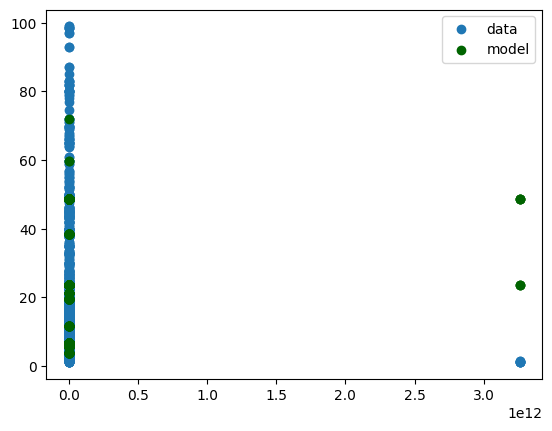

In [126]:
plt.scatter(X['max_power(bhp)'], y, label='data')
plt.scatter(X['max_power(bhp)'], model.predict(X), c='darkgreen', label='model')
plt.legend()

In [127]:
impotance = pd.DataFrame({'importance': model['tree'].feature_importances_},
                         index=model['tree'].feature_names_in_)

# сортування ознак за важливістю
impotance.sort_values(by='importance', ascending=False, inplace=True)

impotance.round(3)

,importance
num__max_power(bhp),0.600
num__kms_driven,0.208
num__torque(Nm),0.173
num__mileage(kmpl),0.019
num__seats,0.000
cat__manufacturing_year_2019,0.000
cat__manufacturing_year_2014,0.000
cat__manufacturing_year_2015,0.000
cat__manufacturing_year_2016,0.000
cat__manufacturing_year_2017,0.000


<Axes: >

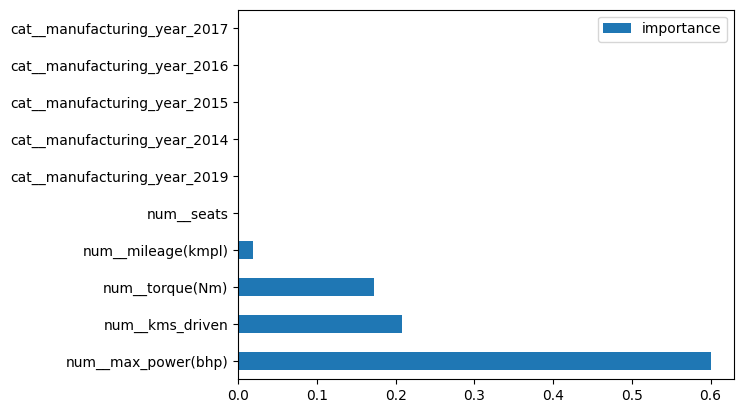

In [128]:
impotance.head(10).plot(kind='barh')

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Text(0.5, 1.0, 'R2 vs tree depth')

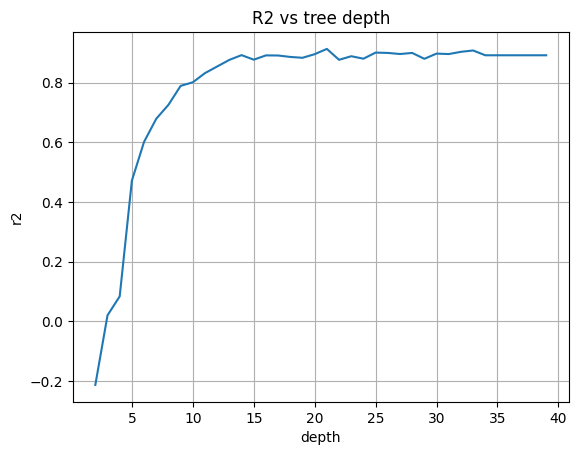

In [132]:
import matplotlib.pyplot as plt

r2 = []
depths = list(range(2, 40))

for depth in depths:
    model = Pipeline(
        [("prep", preprocessor),
        ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                            random_state=42)
        )
        ]
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2.append(metrics.r2_score(y_pred, y_test))


plt.plot(depths, r2)
plt.xlabel('depth')
plt.ylabel('r2')
plt.grid() # сітка
plt.title('R2 vs tree depth')

# Завдання 6
Збережіть модель

In [130]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [131]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=39, random_state=42))])